In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import networkx as nx
import osmnx as ox
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import folium, itertools, os, time, warnings
from IPython.display import display, clear_output

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
stops = pd.read_csv("/content/drive/MyDrive/optimization/stop_df.csv")
stops.head()

,정류장명,세부주소(기존),노선,Latitude,Longitude
0,초당(강문)(하),강릉시 강문동 11-11,"A, B, C",37.795178,128.916162
1,초당(강문)(상),강릉시 강문동 11-2,C,37.795233,128.916103
2,허균∙허난설헌기념공원(상),강릉시 초당동 529,"A, B",37.789730,128.909602
3,허균∙허난설헌기념공원(하),강릉시 초당동 203-2,"A, B",37.789707,128.909763
4,올림픽뮤지엄(하),강릉시 교동 465,"A, B",37.777639,128.898309


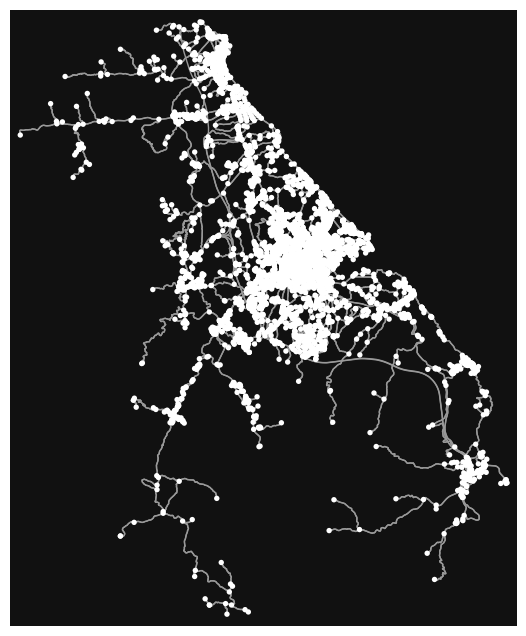

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# 서울 도로 네트워크 데이터 OSM에서 불러오기

G = ox.graph_from_place('Gangneung', network_type='drive')
ox.plot_graph(G)

In [ ]:
#도로망 데이터 기술통계량

# Get the number of nodes
num_nodes = G.number_of_nodes()

# Get the number of edges
num_edges = G.number_of_edges()

# Print the information
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

Number of nodes: 5421
Number of edges: 14320


In [ ]:
import networkx as nx
import geopandas as gpd
from tqdm import tqdm

def stop_setting(stops, G):
    # Create a new column to store the nearest OSM node for each bus stop
    stops['nearest_osm'] = None

    # Get the column names for Latitude and Longitude dynamically
    lat_column = 'Latitude'
    lon_column = 'Longitude'

    # Create a 'geometry' column with Point objects
    stops['geometry'] = gpd.points_from_xy(stops[lon_column], stops[lat_column])

    # Iterate over each grocery and find the nearest OSM node
    for i in tqdm(stops.index, desc="Finding the nearest OSM node for bus stops", position=0):
        # Find the nearest OSM node using the road network graph 'G'
        nearest_osm_node = ox.distance.nearest_nodes(G, stops[lon_column][i], stops[lat_column][i])

        # Assign the nearest OSM node to the 'nearest_osm' column
        stops.at[i, 'nearest_osm'] = nearest_osm_node

    print("Bus Stop setting is done")
    return stops

In [ ]:
stop_setting(stops, G)
stops

Finding the nearest OSM node for bus stops: 100%|██████████| 23/23 [00:01<00:00, 15.30it/s]

Bus Stop setting is done


,정류장명,세부주소(기존),노선,Latitude,Longitude,nearest_osm,geometry
0,초당(강문)(하),강릉시 강문동 11-11,"A, B, C",37.795178,128.916162,914305005,POINT (128.91616 37.79518)
1,초당(강문)(상),강릉시 강문동 11-2,C,37.795233,128.916103,914305005,POINT (128.91610 37.79523)
2,허균∙허난설헌기념공원(상),강릉시 초당동 529,"A, B",37.789730,128.909602,3248979477,POINT (128.90960 37.78973)
3,허균∙허난설헌기념공원(하),강릉시 초당동 203-2,"A, B",37.789707,128.909763,3248979477,POINT (128.90976 37.78971)
4,올림픽뮤지엄(하),강릉시 교동 465,"A, B",37.777639,128.898309,3245592911,POINT (128.89831 37.77764)
5,올림픽뮤지엄(상),강릉시 교동 468-35,"A, B",37.779337,128.895673,3245592916,POINT (128.89567 37.77934)
6,강릉역,강릉시 교동 108-16,A,37.764751,128.901215,2154239211,POINT (128.90122 37.76475)
7,경포호수광장(하),강릉시 강문동 260-20,C,37.800448,128.911267,913347602,POINT (128.91127 37.80045)
8,경포호수광장(상),강릉시 강문동 265-1,C,37.798681,128.911650,914304970,POINT (128.91165 37.79868)
9,홍장암(상),강릉시 저동 2-4,C,37.801236,128.903057,3264588519,POINT (128.90306 37.80124)


In [ ]:
# Example dictionary with English translations for Korean stop names
translation_dict = {
    '초당(강문)(하)': 'Chodang (Gangmun) (Lower)',
    '초당(강문)(상)': 'Chodang (Gangmun) (Upper)',
    '허균∙허난설헌기념공원(상)': 'Heo Gyun∙Heo Nanseolheon Memorial Park (Upper)',
    '허균∙허난설헌기념공원(하)': 'Heo Gyun∙Heo Nanseolheon Memorial Park (Lower)',
    '올림픽뮤지엄(하)': 'Olympic Museum (Lower)',
    '올림픽뮤지엄(상)': 'Olympic Museum (Upper)',
    '강릉역': 'Gangneung Station',
    '경포호수광장(하)': 'Gyeongpo Lake Square (Lower)',
    '경포호수광장(상)': 'Gyeongpo Lake Square (Upper)',
    '홍장암(상)': 'Hongjangam (Upper)',
    '홍장암(하)': 'Hongjangam (Lower)',
    '경포대': 'Gyeongpo Pavilion',
    '경포가시연습지': 'Gyeongpo Fisheries Experience Center',
    '선교장(상)': 'Seonkyojang (Upper)',
    '선교장(하)': 'Seonkyojang (Lower)',
    '오죽헌': 'Ojukheon',
    '안목해변': 'Anmok Beach',
    '송정해변(하)': 'Songjeong Beach (Lower)',
    '송정해변(상)': 'Songjeong Beach (Upper)',
    '세인트존스호텔(하)': 'St. John’s Hotel (Lower)',
    '세인트존스호텔(상)': 'St. John’s Hotel (Upper)',
    '녹색도시체험센터': 'Green City Experience Center',
    '스카이베이': 'Sky Bay'
}

# Add more translations as needed

# Apply the translation dictionary to the '정류장명' column in the 'stops' DataFrame
stops['stopname_eng'] = stops['정류장명'].map(translation_dict)

# Display the updated DataFrame
print(stops)

              정류장명        세부주소(기존)       노선   Latitude   Longitude  \
0        초당(강문)(하)   강릉시 강문동 11-11  A, B, C  37.795178  128.916162   
1        초당(강문)(상)    강릉시 강문동 11-2        C  37.795233  128.916103   
2   허균∙허난설헌기념공원(상)     강릉시 초당동 529     A, B  37.789730  128.909602   
3   허균∙허난설헌기념공원(하)   강릉시 초당동 203-2     A, B  37.789707  128.909763   
4        올림픽뮤지엄(하)      강릉시 교동 465     A, B  37.777639  128.898309   
5        올림픽뮤지엄(상)   강릉시 교동 468-35     A, B  37.779337  128.895673   
6              강릉역   강릉시 교동 108-16        A  37.764751  128.901215   
7        경포호수광장(하)  강릉시 강문동 260-20        C  37.800448  128.911267   
8        경포호수광장(상)   강릉시 강문동 265-1        C  37.798681  128.911650   
9           홍장암(상)      강릉시 저동 2-4        C  37.801236  128.903057   
10          홍장암(하)      강릉시 저동 2-4        C  37.801236  128.903057   
11             경포대   강릉시 저동 656-10        C  37.795192  128.896927   
12         경포가시연습지      강릉시 저동 645        C  37.797273  128.900179   
13          선교장(상)  

In [ ]:
stops

,정류장명,세부주소(기존),노선,Latitude,Longitude,nearest_osm,geometry,stopname_eng
0,초당(강문)(하),강릉시 강문동 11-11,"A, B, C",37.795178,128.916162,914305005,POINT (128.91616 37.79518),Chodang (Gangmun) (Lower)
1,초당(강문)(상),강릉시 강문동 11-2,C,37.795233,128.916103,914305005,POINT (128.91610 37.79523),Chodang (Gangmun) (Upper)
2,허균∙허난설헌기념공원(상),강릉시 초당동 529,"A, B",37.789730,128.909602,3248979477,POINT (128.90960 37.78973),Heo Gyun∙Heo Nanseolheon Memorial Park (Upper)
3,허균∙허난설헌기념공원(하),강릉시 초당동 203-2,"A, B",37.789707,128.909763,3248979477,POINT (128.90976 37.78971),Heo Gyun∙Heo Nanseolheon Memorial Park (Lower)
4,올림픽뮤지엄(하),강릉시 교동 465,"A, B",37.777639,128.898309,3245592911,POINT (128.89831 37.77764),Olympic Museum (Lower)
5,올림픽뮤지엄(상),강릉시 교동 468-35,"A, B",37.779337,128.895673,3245592916,POINT (128.89567 37.77934),Olympic Museum (Upper)
6,강릉역,강릉시 교동 108-16,A,37.764751,128.901215,2154239211,POINT (128.90122 37.76475),Gangneung Station
7,경포호수광장(하),강릉시 강문동 260-20,C,37.800448,128.911267,913347602,POINT (128.91127 37.80045),Gyeongpo Lake Square (Lower)
8,경포호수광장(상),강릉시 강문동 265-1,C,37.798681,128.911650,914304970,POINT (128.91165 37.79868),Gyeongpo Lake Square (Upper)
9,홍장암(상),강릉시 저동 2-4,C,37.801236,128.903057,3264588519,POINT (128.90306 37.80124),Hongjangam (Upper)


In [ ]:
len(stops['nearest_osm'].unique())

17

In [ ]:
# distance matrix 생성

import networkx as nx
import pandas as pd

# Function to get the network distance between two nodes
def get_network_distance(node1, node2, graph):
    try:
        distance = nx.shortest_path_length(graph, source=node1, target=node2, weight='length')
        return distance
    except nx.NetworkXNoPath:
        return float('inf')  # or np.nan, depending on your preference

# Extract unique nodes from the 'nearest_osm' column
nodes = stops['nearest_osm'].unique()

# Create an empty distance matrix
distance_matrix = pd.DataFrame(index=nodes, columns=nodes)

# Calculate distances and fill the matrix
for node1 in nodes:
    for node2 in nodes:
        if node1 != node2:
            distance = get_network_distance(node1, node2, G)
            distance_matrix.at[node1, node2] = distance

# Display the distance matrix
print(distance_matrix)

           914305005  3248979477 3245592911 3245592916 2154239211 913347602   \
914305005         NaN   1086.023   3112.021   3046.386   4381.461    850.968   
3248979477   1086.023        NaN   2025.998   1960.363   3317.884     1630.3   
3245592911    3047.18   1961.157        NaN     65.635    1783.02   3591.457   
3245592916   2981.545   1895.522     65.635        NaN   1848.655   3525.822   
2154239211   4379.372   3317.884    1783.02   1848.655        NaN   4948.184   
913347602     850.968     1630.3   3656.298   3590.663   4948.184        NaN   
914304970     700.247   1376.742    3402.74   3337.105   4694.626    253.558   
3264588519   1870.168     2649.5   3124.232   3058.597   4907.252     1019.2   
3268748904   2783.892   3363.614   2210.508   2144.873   3993.528   1932.924   
3268748912   2168.805   2948.137   2825.595    2759.96   4608.615   1317.837   
3269899013   4367.308   3281.285   2128.179   2062.544   3693.358   3879.345   
3239003694   4239.345   3153.322   2000.

In [ ]:
# 거리 행렬
# 단위 : m

distance_matrix

,914305005,3248979477,3245592911,3245592916,2154239211,913347602,914304970,3264588519,3268748904,3268748912,3269899013,3239003694,5569882168,4690275887,414903566,1957602631,4655182274
914305005,NaN,1086.023,3112.021,3046.386,4381.461,850.968,665.392,1925.221,2838.945,2223.858,4283.394,4163.784,3565.394,2923.258,2569.075,519.804,1783.095
3248979477,1086.023,NaN,2025.998,1960.363,3317.884,1630.3,1376.742,2704.553,3279.7,3003.19,3197.371,3077.761,3857.488,3381.009,3307.635,1522.159,697.072
3245592911,3047.18,1961.157,NaN,65.635,1783.02,3591.457,3337.899,3101.019,2187.295,2802.382,2104.966,1985.356,5048.987,4777.858,4704.484,3483.316,2163.223
3245592916,2981.545,1895.522,65.635,NaN,1848.655,3525.822,3272.264,3035.384,2121.66,2736.747,2039.331,1919.721,5114.622,4843.493,4770.119,3417.681,2097.588
2154239211,4379.372,3317.884,1783.02,1848.655,NaN,4948.184,4694.626,4884.039,3970.315,4585.402,3604.973,2963.818,4308.506,4037.377,3964.003,4069.473,3519.95
913347602,850.968,1630.3,3656.298,3590.663,4948.184,NaN,253.558,1074.253,1987.977,1372.89,3934.398,4708.061,4355.099,3712.963,3420.043,1370.772,2327.372
914304970,700.247,1376.742,3402.74,3337.105,4694.626,253.558,NaN,1327.811,2241.535,1626.448,4187.956,4454.503,4101.541,3459.405,3228.988,1179.717,2073.814
3264588519,1870.168,2649.5,3124.232,3058.597,4907.252,1019.2,1272.758,NaN,913.724,298.637,2860.145,3756.922,5374.299,4732.163,4439.243,2389.972,3346.572
3268748904,2783.892,3363.614,2210.508,2144.873,3993.528,1932.924,2186.482,913.724,NaN,615.087,1946.421,2843.198,6288.023,5645.887,5352.967,3303.696,3565.68
3268748912,2168.805,2948.137,2825.595,2759.96,4608.615,1317.837,1571.395,298.637,615.087,NaN,2561.508,3458.285,5672.936,5030.8,4737.88,2688.609,3645.209


In [ ]:
# Create a NumPy array from the DataFrame
distance_array = distance_matrix.to_numpy()

# Flatten the upper triangle of the distance matrix (excluding the diagonal)
flat_distances = distance_array[np.triu_indices(distance_array.shape[0], k=1)]

# Calculate mean and median
mean_distance = np.mean(flat_distances)
median_distance = np.median(flat_distances)

print(f"Mean distance: {mean_distance}")
print(f"Median distance: {median_distance}")

Mean distance: 3188.0160514705863
Median distance: 3275.982


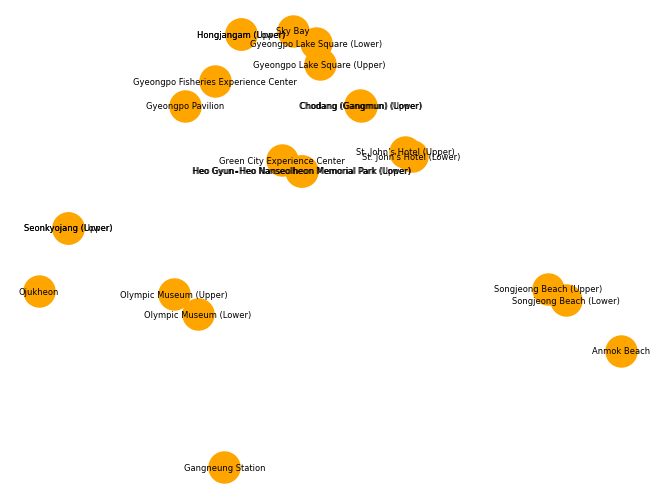

In [ ]:
import networkx as nx
import pandas as pd
from shapely.geometry import Point

# Change the name of the graph
H = nx.Graph()  # Use a copy of the existing graph to avoid modifying the original graph

# Add nodes with point geometries from the 'geometry' column
for index, row in stops.iterrows():
    node = row['stopname_eng']
    point_geometry = row['geometry']
    H.add_node(node, pos=(point_geometry.x, point_geometry.y))

# Visualize the graph (optional)
import matplotlib.pyplot as plt
pos = nx.get_node_attributes(H, 'pos')
nx.draw(H, pos=pos, with_labels=True, node_size=500, node_color='orange', font_size=6, font_color='black')
plt.show()


In [ ]:
import pandas as pd

# Drop duplicates based on the 'nearest_osm' column and keep the first occurrence
stops_unique = stops.drop_duplicates(subset='nearest_osm', keep='first')

# Display the resulting dataframe
stops_unique

,정류장명,세부주소(기존),노선,Latitude,Longitude,nearest_osm,geometry,stopname_eng
0,초당(강문)(하),강릉시 강문동 11-11,"A, B, C",37.795178,128.916162,914305005,POINT (128.91616 37.79518),Chodang (Gangmun) (Lower)
2,허균∙허난설헌기념공원(상),강릉시 초당동 529,"A, B",37.789730,128.909602,3248979477,POINT (128.90960 37.78973),Heo Gyun∙Heo Nanseolheon Memorial Park (Upper)
4,올림픽뮤지엄(하),강릉시 교동 465,"A, B",37.777639,128.898309,3245592911,POINT (128.89831 37.77764),Olympic Museum (Lower)
5,올림픽뮤지엄(상),강릉시 교동 468-35,"A, B",37.779337,128.895673,3245592916,POINT (128.89567 37.77934),Olympic Museum (Upper)
6,강릉역,강릉시 교동 108-16,A,37.764751,128.901215,2154239211,POINT (128.90122 37.76475),Gangneung Station
7,경포호수광장(하),강릉시 강문동 260-20,C,37.800448,128.911267,913347602,POINT (128.91127 37.80045),Gyeongpo Lake Square (Lower)
8,경포호수광장(상),강릉시 강문동 265-1,C,37.798681,128.911650,914304970,POINT (128.91165 37.79868),Gyeongpo Lake Square (Upper)
9,홍장암(상),강릉시 저동 2-4,C,37.801236,128.903057,3264588519,POINT (128.90306 37.80124),Hongjangam (Upper)
11,경포대,강릉시 저동 656-10,C,37.795192,128.896927,3268748904,POINT (128.89693 37.79519),Gyeongpo Pavilion
12,경포가시연습지,강릉시 저동 645,C,37.797273,128.900179,3268748912,POINT (128.90018 37.79727),Gyeongpo Fisheries Experience Center


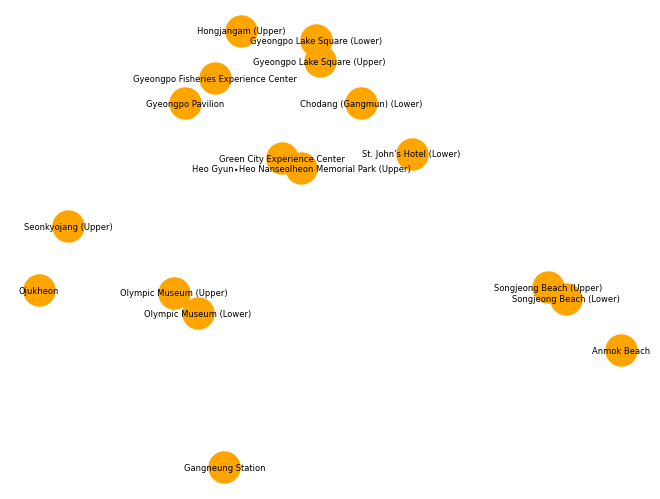

In [ ]:
import networkx as nx
import pandas as pd
from shapely.geometry import Point

# Change the name of the graph
H_unique = nx.Graph()  # Use a copy of the existing graph to avoid modifying the original graph

# Add nodes with point geometries from the 'geometry' column
for index, row in stops_unique.iterrows():
    node = row['stopname_eng']
    point_geometry = row['geometry']
    H_unique.add_node(node, pos=(point_geometry.x, point_geometry.y))

# Visualize the graph (optional)
import matplotlib.pyplot as plt
pos_unique = nx.get_node_attributes(H_unique, 'pos')
nx.draw(H_unique, pos=pos_unique, with_labels=True, node_size=500, node_color='orange', font_size=6, font_color='black')
plt.show()

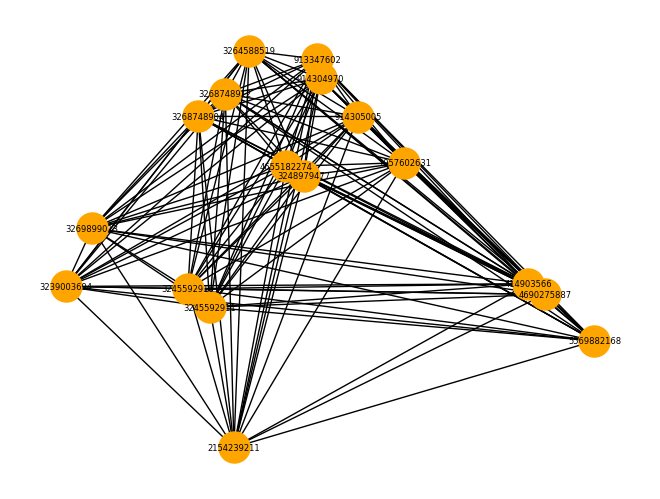

In [ ]:
# Change the name of the graph
H_unique = nx.Graph()  # Use a copy of the existing graph to avoid modifying the original graph

# Add nodes with point geometries from the 'geometry' column
for index, row in stops_unique.iterrows():
    node = row['nearest_osm']
    point_geometry = row['geometry']
    H_unique.add_node(node, pos=(point_geometry.x, point_geometry.y))

# Add edges with network distances
for i, row_i in stops_unique.iterrows():
    for j, row_j in stops_unique.iterrows():
        if i < j:  # Avoid duplicate edges and self-loops
            source = row_i['nearest_osm']
            target = row_j['nearest_osm']
            distance = distance_matrix.loc[source, target]  # Replace with your actual distance matrix
            H_unique.add_edge(source, target)

# Visualize the graph (optional)
import matplotlib.pyplot as plt
pos_unique = nx.get_node_attributes(H_unique, 'pos')
nx.draw(H_unique, pos=pos_unique, with_labels=True, node_size=500, node_color='orange', font_size=6, font_color='black')
plt.show()

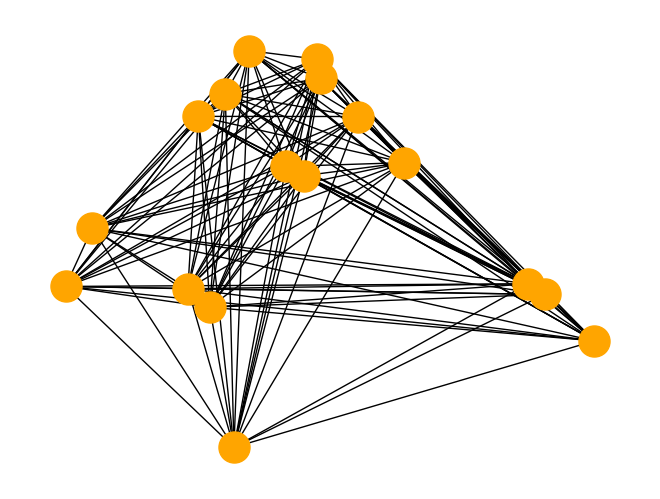

In [ ]:
#"2154239211"
# Change the name of the graph
H_unique = nx.Graph()  # Use a copy of the existing graph to avoid modifying the original graph

# Add nodes with point geometries from the 'geometry' column
for index, row in stops_unique.iterrows():
    node = row['nearest_osm']
    point_geometry = row['geometry']
    H_unique.add_node(node, pos=(point_geometry.x, point_geometry.y))

# Add edges with network distances
for i, row_i in stops_unique.iterrows():
    for j, row_j in stops_unique.iterrows():
        if i < j:  # Avoid duplicate edges and self-loops
            source = row_i['nearest_osm']
            target = row_j['nearest_osm']
            distance = distance_matrix.loc[source, target]  # Replace with your actual distance matrix
            H_unique.add_edge(source, target)

# Visualize the graph (optional)
import matplotlib.pyplot as plt
pos_unique = nx.get_node_attributes(H_unique, 'pos')
nx.draw(H_unique, pos=pos_unique, node_size=500, node_color='orange', font_size=6, font_color='black')
plt.show()

In [ ]:
!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.5 MB/s eta 0:00:00


In [ ]:
k = 3  # number of routes, vehicles
n = len(stops_unique)  # number of demand points

depot = 'Gangneung Station'
dem_points = list(stops_unique['nearest_osm'])


In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import gurobipy as gp
from gurobipy import GRB

# Create a graph
G = nx.DiGraph()

# Add nodes to the graph with position information
pos = {row["nearest_osm"]: (row["Longitude"], row["Latitude"]) for _, row in stops_unique.iterrows()}
for idx, row in stops_unique.iterrows():
    G.add_node(row["nearest_osm"], pos=pos[row["nearest_osm"]])

# Add edges to the graph with distance information
for i, row in distance_matrix.iterrows():
    for j, distance in row.iteritems():
        if not math.isnan(distance):
            G.add_edge(i, j, length=distance)

# Define parameters
num_vehicles = 3
vehicle_capacity = 5

# Set the depot as the nearest_osm value for Gangneung Station
depot_nearest_osm = 2154239211

# Create the optimization model
model = gp.Model()
x = model.addVars(G.edges, vtype=GRB.BINARY)

# Set objective function
model.setObjective(gp.quicksum(G.edges[i, j]['length'] * x[i, j] for i, j in G.edges), GRB.MINIMIZE)

# Enter each demand point once
model.addConstrs(gp.quicksum(x[i, j] for i in G.predecessors(j)) == 1 for j in G.nodes)

# Leave each demand point once
model.addConstrs(gp.quicksum(x[i, j] for j in G.successors(i)) == 1 for i in G.nodes)

# Leave the depot k times
model.addConstr(gp.quicksum(x[depot_nearest_osm, j] for j in G.successors(depot_nearest_osm)) == num_vehicles)

# Solve the relaxation
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)

# Add the MTZ variables and constraints, and solve
u = model.addVars(G.nodes)

u[depot_nearest_osm].LB = 0
u[depot_nearest_osm].UB = 0

for i, row in stops_unique.iterrows():
    u[row["nearest_osm"]].LB = q[row["nearest_osm"]]
    u[row["nearest_osm"]].UB = vehicle_capacity

c = model.addConstrs(u[i] - u[j] + vehicle_capacity * x[i, j] <= vehicle_capacity - q[j] for i, j in G.edges if j != depot_nearest_osm)

model.optimize()

# Try again, using a stronger ("lifted") version of these constraints
model.remove(c)

model.addConstrs(u[i] - u[j] + vehicle_capacity * x[i, j] + (vehicle_capacity - q[i] - q[j]) * x[j, i] <= vehicle_capacity - q[j] for i, j in G.edges if j != depot_nearest_osm)

model.reset()
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 35 rows, 272 columns and 560 nonzeros
Model fingerprint: 0xf31aa013
Variable types: 0 continuous, 272 integer (272 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+01, 7e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


<ipython-input-104-aa1df7c8cc02>:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, distance in row.iteritems():


AttributeError: ignored

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import gurobipy as gp
from gurobipy import GRB

# Create a graph
G = nx.DiGraph()

# Add nodes to the graph with position information
pos = {row["nearest_osm"]: (row["Longitude"], row["Latitude"]) for _, row in stops_unique.iterrows()}
for idx, row in stops_unique.iterrows():
    G.add_node(row["nearest_osm"], pos=pos[row["nearest_osm"]])

# Calculate Euclidean distances and add edges to the graph
for i, row_i in stops_unique.iterrows():
    for j, row_j in stops_unique.iterrows():
        if i != j:
            distance = math.sqrt((row_i["Longitude"] - row_j["Longitude"])**2 + (row_i["Latitude"] - row_j["Latitude"])**2)
            G.add_edge(row_i["nearest_osm"], row_j["nearest_osm"], length=distance)

# Define parameters
num_vehicles = 3
vehicle_capacity = 5

# Set the depot as the nearest_osm value for Gangneung Station
depot_nearest_osm = 2154239211

# Create the optimization model
model = gp.Model()
x = model.addVars(G.edges, vtype=GRB.BINARY)

# Set objective function
model.setObjective(gp.quicksum(G.edges[i, j]['length'] * x[i, j] for i, j in G.edges), GRB.MINIMIZE)

# Enter each demand point once
model.addConstrs(gp.quicksum(x[i, j] for i in G.predecessors(j)) == 1 for j in G.nodes)

# Leave each demand point once
model.addConstrs(gp.quicksum(x[i, j] for j in G.successors(i)) == 1 for i in G.nodes)

# Leave the depot k times
model.addConstr(gp.quicksum(x[depot_nearest_osm, j] for j in G.successors(depot_nearest_osm)) == num_vehicles)

# Solve the relaxation
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)

# Add the MTZ variables and constraints, and solve
u = model.addVars(G.nodes)

u[depot_nearest_osm].LB = 0
u[depot_nearest_osm].UB = 0

for i, row in stops_unique.iterrows():
    u[row["nearest_osm"]].LB = q[row["nearest_osm"]]
    u[row["nearest_osm"]].UB = vehicle_capacity

c = model.addConstrs(u[i] - u[j] + vehicle_capacity * x[i, j] <= vehicle_capacity - q[j] for i, j in G.edges if j != depot_nearest_osm)

model.optimize()

# Try again, using a stronger ("lifted") version of these constraints
model.remove(c)

model.addConstrs(u[i] - u[j] + vehicle_capacity * x[i, j] + (vehicle_capacity - q[i] - q[j]) * x[j, i] <= vehicle_capacity - q[j] for i, j in G.edges if j != depot_nearest_osm)

model.reset()
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 35 rows, 272 columns and 560 nonzeros
Model fingerprint: 0x90aa6e56
Variable types: 0 continuous, 272 integer (272 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-03, 6e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.05 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


AttributeError: ignored

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import gurobipy as gp
from gurobipy import GRB

# Create a graph
G = nx.DiGraph()

# Add nodes to the graph with position information
pos = {row["nearest_osm"]: (row["Longitude"], row["Latitude"]) for _, row in stops_unique.iterrows()}
for idx, row in stops_unique.iterrows():
    G.add_node(row["nearest_osm"], pos=pos[row["nearest_osm"]])


# Add edges to the graph with distance information
for i, row in distance_matrix.iterrows():
    for j, distance in row.iteritems():
        if not math.isnan(distance):
            G.add_edge(i, j, length=distance)

# Define parameters
num_vehicles = 3
vehicle_capacity = 5

# Set the depot as the nearest_osm value for Gangneung Station
depot_nearest_osm = 2154239211

# Nearest Neighbor Heuristic
def nearest_neighbor_heuristic(G, start_node):
    tour = [start_node]
    while len(tour) < len(G.nodes):
        current_node = tour[-1]
        neighbors = list(G.successors(current_node))
        nearest_neighbor = min(neighbors, key=lambda neighbor: G.edges[current_node, neighbor]['length'])
        tour.append(nearest_neighbor)
    return tour

# Use Nearest Neighbor Heuristic to get an initial solution
initial_tour = nearest_neighbor_heuristic(G, depot_nearest_osm)

# Create the optimization model
model = gp.Model()
x = model.addVars(G.edges, vtype=GRB.BINARY)

# Set objective function
model.setObjective(gp.quicksum(G.edges[i, j]['length'] * x[i, j] for i, j in G.edges), GRB.MINIMIZE)

# Enter each demand point once
model.addConstrs(gp.quicksum(x[i, j] for i in G.predecessors(j)) == 1 for j in G.nodes)

# Leave each demand point once
model.addConstrs(gp.quicksum(x[i, j] for j in G.successors(i)) == 1 for i in G.nodes)

# Leave the depot k times
model.addConstr(gp.quicksum(x[depot_nearest_osm, j] for j in G.successors(depot_nearest_osm)) == num_vehicles)

# Apply the initial solution to warm-start the optimization
for i, j in zip(initial_tour[:-1], initial_tour[1:]):
    x[i, j].start = 1

# Solve the optimization problem
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 35 rows, 272 columns and 560 nonzeros
Model fingerprint: 0xabcec68e
Variable types: 0 continuous, 272 integer (272 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e+01, 7e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]

User MIP start did not produce a new incumbent solution
User MIP start violates constraint R2 by 1.000000000

Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


<ipython-input-110-d3a052a7ee23>:24: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, distance in row.iteritems():


AttributeError: ignored

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import math
import gurobipy as gp
from gurobipy import GRB

# Create a complete graph
G = nx.complete_graph(len(stops_unique))

# Add nodes to the graph with position information
pos = {row["nearest_osm"]: (row["Longitude"], row["Latitude"]) for _, row in stops_unique.iterrows()}
nx.set_node_attributes(G, pos, name="pos")

# Add edges to the graph with distance information
for i, row in distance_matrix.iterrows():
    for j, distance in row.items():
        if not math.isnan(distance):
            G[i][j]['length'] = distance

# Define parameters
num_vehicles = 3
vehicle_capacity = 5

# Set the depot as the nearest_osm value for Gangneung Station
depot_nearest_osm = "Your_Nearest_OSM_Value_for_Gangneung_Station"

# Find minimum spanning tree
T = nx.minimum_spanning_tree(G, weight='length')

# Double (or bi-direct) the minimum spanning tree
D = nx.Graph(T)

# Find an Eulerian cycle of the doubled spanning tree
initial_tour = list(nx.eulerian_circuit(D, source=0))

# Take shortcuts (avoid repeated nodes)
tour = [0]
for (i, j) in initial_tour:
    if j not in tour:
        tour.append(j)

# Create the optimization model
model = gp.Model()
x = model.addVars(G.edges, vtype=GRB.BINARY)

# Set objective function
model.setObjective(gp.quicksum(G[i][j]['length'] * x[i, j] for i, j in G.edges), GRB.MINIMIZE)

# Enter each demand point once
model.addConstrs(gp.quicksum(x[i, j] for i in G.predecessors(j)) == 1 for j in G.nodes)

# Leave each demand point once
model.addConstrs(gp.quicksum(x[i, j] for j in G.successors(i)) == 1 for i in G.nodes)

# Leave the depot k times
model.addConstr(gp.quicksum(x[depot_nearest_osm, j] for j in G.successors(depot_nearest_osm)) == num_vehicles)

# Apply the initial solution to warm-start the optimization
for i, j in zip(tour[:-1], tour[1:]):
    x[i, j].start = 1

# Solve the optimization problem
model.optimize()

# Get the solution and draw it
tour_edges = [e for e in G.edges if x[e].x > 0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=pos)

KeyError: ignored